In [30]:
#Import modules
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Set seed for random number generator
np.random.seed(414)

#Generate toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, 0.2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X' : train_X, 'y' : train_y})
test_df = pd.DataFrame({'X' : test_X, 'y' : test_y})

#Linear fit train data
poly_1 = smf.ols(formula = 'y ~ 1 + X', data = train_df).fit()

#Quadratic fit train data
poly_2 = smf.ols(formula = 'y ~ 1 + X + I(X**2)', 
                 data = train_df).fit()

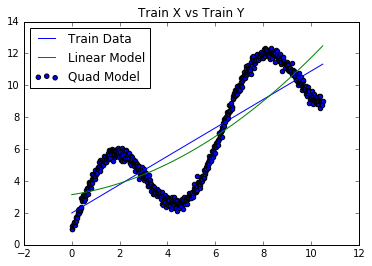

In [40]:
#Plot model predictions with train data
#Create x-axis for models
x_axis = np.linspace(min(train_X),max(train_X), 100)

#Linear model
linear_y = [poly_1.params[0] + poly_1.params[1]*x
               for x in x_axis]

#Quadratic model
quad_y = [poly_2.params[0] 
          + poly_2.params[1] * x 
          + poly_2.params[2] * x**2
            for x in x_axis]

#Plot data
plt.scatter(train_X,train_y)
plt.plot(x_axis,linear_y)
plt.plot(x_axis,quad_y)

#Prettify plot
plt.title('Train X vs Train Y')
plt.legend(['Train Data','Linear Model','Quad Model'],loc = 2)

In [13]:
#Print summary from linear fit
print('Model Summary for Linear Fit\n')
print(poly_1.summary())
print('\n\n')

#Print summary from quadratic fit
print('Model Summary for Quadratic Fit\n')
print(poly_2.summary())

Model Summary for Linear Fit

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1254.
Date:                Sat, 30 Jul 2016   Prob (F-statistic):          5.52e-158
Time:                        11:18:31   Log-Likelihood:                -1483.4
No. Observations:                 700   AIC:                             2971.
Df Residuals:                     698   BIC:                             2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9959 